In [1]:
import numpy as np
import matplotlib.pyplot as plt
import flopy
import os
import xmf6

In [2]:
init = {
    'sim_name' : "flow",
    'exe_name' : "C:\\Users\\luiggi\\Documents\\GitSites\\xmf6\\mf6\\windows\\mf6",
    'sim_ws' : "sandbox4"
}

time = {
    'units': "DAYS",
    'nper' : 1,
    'perioddata': [(1.0, 1, 1.0)]
}

ims = {}

gwf = { 
    'modelname': init["sim_name"],
    'model_nam_file': f"{init["sim_name"]}.nam",
    'save_flows': True
}

dis = {
    'nlay': 1, 
    'nrow': 20, 
    'ncol': 30,
    'delr': 0.5, 
    'delc': 0.5, 
    'top' : 0.0, 
    'botm': -1.0 
}

ic = {
    'strt': 10
}

chd_data = []
for row in range(dis['nrow']):
    chd_data.append([(0, row, 0), 10.0])       # Condición en la pared izquierda
    chd_data.append([(0, row, dis['ncol'] - 1), 5.0]) # Condición en la pared derecha

chd = {
    'stress_period_data': chd_data,     
}

k_data = np.random.rand(dis['nlay'], dis['nrow'], dis['ncol'])*1.0 
k_data[:,5:15,10:20] = 0.1

npf = {
    'save_specific_discharge': True,
    'k': k_data, 
}

oc = {
    'budget_filerecord': f"{init['sim_name']}.bud",
    'head_filerecord': f"{init['sim_name']}.hds",
    'saverecord': [("HEAD", "ALL"), ("BUDGET", "ALL")],
    'printrecord': [("HEAD", "ALL")]
}


* Función `xmf6.gwf.initialize()`.
    - SIM
    - TDIS
    - IMS 
* Función `xmf6.gwf.build()`.
    - GWF 
        + DIS
        + IC
        + CHD
        + NPF
        + WEL
        + OC

In [3]:
o_sim = xmf6.gwf.initialize(init = init, time = time, ims = ims)



sim configuration::
  sim_name = flow
  exe_name = C:\Users\luiggi\Documents\GitSites\xmf6\mf6\windows\mf6
  sim_ws = sandbox4
---



time configuration::
  units = DAYS
  nper = 1
  perioddata = [(1.0, 1, 1.0)]
---



numerical solution configuration::
---



In [4]:
o_gwf = xmf6.gwf.build(o_sim,
                       gwf = gwf, dis = dis, ic = ic, chd = chd, npf = npf, oc = oc)



numerical model configuration::
  modelname = flow
  model_nam_file = flow.nam
  save_flows = True
---



spatial discretization configuration::
  nlay = 1
  nrow = 20
  ncol = 30
  delr = 0.5
  delc = 0.5
  top = 0.0
  botm = -1.0
---



initial conditions configuration::
  strt = 10
---



boundary conditions configuration::
  stress_period_data = [[(0, 0, 0), 10.0], [(0, 0, 29), 5.0], [(0, 1, 0), 10.0], [(0, 1, 29), 5.0], [(0, 2, 0), 10.0], [(0, 2, 29), 5.0], [(0, 3, 0), 10.0], [(0, 3, 29), 5.0], [(0, 4, 0), 10.0], [(0, 4, 29), 5.0], [(0, 5, 0), 10.0], [(0, 5, 29), 5.0], [(0, 6, 0), 10.0], [(0, 6, 29), 5.0], [(0, 7, 0), 10.0], [(0, 7, 29), 5.0], [(0, 8, 0), 10.0], [(0, 8, 29), 5.0], [(0, 9, 0), 10.0], [(0, 9, 29), 5.0], [(0, 10, 0), 10.0], [(0, 10, 29), 5.0], [(0, 11, 0), 10.0], [(0, 11, 29), 5.0], [(0, 12, 0), 10.0], [(0, 12, 29), 5.0], [(0, 13, 0), 10.0], [(0, 13, 29), 5.0], [(0, 14, 0), 10.0], [(0, 14, 29), 5.0], [(0, 15, 0), 10.0], [(0, 15, 29), 5.0], [(0, 16, 0), 10.0], [(0, 

In [5]:
o_sim.write_simulation(silent = True)

In [6]:
o_sim.run_simulation(silent=False)

FloPy is using the following executable to run the model: ..\..\..\..\mf6\windows\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.6.1 02/10/2025

   MODFLOW 6 compiled Feb 10 2025 17:37:25 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Go

(True, [])

In [7]:
# --- Recuperamos los resultados de la simulación ---
head = xmf6.gwf.get_head(o_sim, o_gwf)
qx, qy, qz, n_q = xmf6.gwf.get_specific_discharge(o_sim, o_gwf)

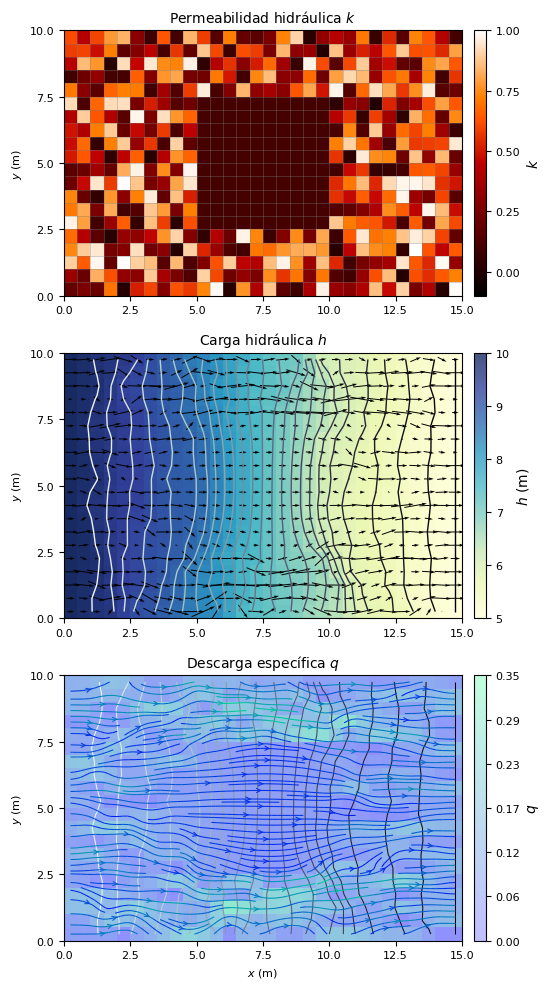

In [8]:
# --- Parámetros para las gráficas ---
grid = o_gwf.modelgrid
x, y, z = grid.xyzcellcenters
xticks = np.linspace(grid.extent[0], grid.extent[1], 7)
yticks = np.linspace(grid.extent[2], grid.extent[3], 5)
xlabels = [f'{x:1.1f}' for x in xticks]
ylabels = [f'{y:1.1f}' for y in yticks]
kvmin = 1.0 #np.nanmin(k_data)
kvmax = 0.0 #np.nanmax(k_data)
hvmin = np.nanmin(head)
hvmax = np.nanmax(head)
qvmin = 0.00 #np.nanmin(n_q)
qvmax = 0.35 #np.nanmax(n_q)

# --- Definición de la figura ---
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize =(10,10))

# --- Gráfica 1. ---
kview = flopy.plot.PlotMapView(model = o_gwf, ax = ax1)
kview.plot_grid(linewidths = 0.5, alpha = 0.5)
k_ac = kview.plot_array(k_data, cmap = "gist_heat", vmin = kvmin, vmax = kvmax)
k_cb = plt.colorbar(k_ac, ax = ax1, label = "$k$", 
                    ticks = [0.0, 0.25, 0.50, 0.75, 1.0],
                    cax = xmf6.vis.cax(ax1, k_ac))
k_cb.ax.tick_params(labelsize=8)
ax1.set_title("Permeabilidad hidráulica $k$", fontsize=10)
ax1.set_ylabel("$y$ (m)", fontsize = 8)
ax1.set_xticks(ticks = xticks, labels = xlabels, fontsize = 8)
ax1.set_yticks(ticks = yticks, labels = ylabels, fontsize = 8)
ax1.set_aspect('equal')

# --- Gráfica 2. ---
hview = flopy.plot.PlotMapView(model = o_gwf, ax = ax2)
h_ac = hview.plot_array(head, cmap = "YlGnBu", vmin = hvmin, vmax = hvmax, alpha = 0.75)
hview.contour_array(head, levels = 30, cmap = "bone", linewidths = 1.0)
ax2.quiver(x, y, qx[0], qy[0], scale = 3, 
           color = 'k', linewidth = 0.95, pivot = 'middle')
h_cb = plt.colorbar(h_ac, ax = ax2, label = "$h$ (m)", 
                    cax = xmf6.vis.cax(ax2, h_ac))
h_cb.ax.tick_params(labelsize=8)
ax2.set_title("Carga hidráulica $h$", fontsize=10)
ax2.set_ylabel("$y$ (m)", fontsize = 8)
ax2.set_xticks(ticks = xticks, labels = xlabels, fontsize = 8)
ax2.set_yticks(ticks = yticks, labels = ylabels, fontsize = 8)
ax2.set_aspect('equal')

# --- Gráfica 3. ---
fview = flopy.plot.PlotMapView(model = o_gwf, ax = ax3)
q_ac = fview.plot_array(n_q, cmap = "winter", vmin = qvmin, vmax = qvmax, alpha = 0.25)
fview.contour_array(head, levels = 20, cmap = 'bone', linewidths = 0.75, )
ax3.streamplot(x, y[::-1][:], qx[0], qy[0][::-1], 
               density = [2, 1.5], linewidth = 0.75, broken_streamlines = True, 
               color = n_q, cmap = "winter", 
               arrowstyle = "->", arrowsize = 0.75,  )
q_cb = plt.colorbar(q_ac, ax=ax3, label="$q$", 
                    ticks = np.linspace(0.0, 0.35, 7),
                    format = "{x:3.2f}",
                    cax = xmf6.vis.cax(ax3, q_ac))
q_cb.ax.tick_params(labelsize=8)
ax3.set_title("Descarga específica $q$", fontsize=10)
ax3.set_xlabel("$x$ (m)", fontsize = 8)
ax3.set_ylabel("$y$ (m)", fontsize = 8)
ax3.set_xticks(ticks = xticks, labels = xlabels, fontsize = 8)
ax3.set_yticks(ticks = yticks, labels = ylabels, fontsize = 8)
ax3.set_aspect('equal')

plt.tight_layout()
plt.savefig("04_MF6.pdf")
plt.show()